# Tarea 5: Optimización

## Para entregarse el jueves 16 marzo 2017, antes de las 15:00

In [7]:
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

Una tarea importante en la ciencia computacional es la **optimización**, es decir, encontrar máximos y mínimos de funciones. Representa una aplicación de suma importancia de derivadas, como aprendimos en Cálculo 1 y 3 y en el notebook 7.

**[1]** Escribe una función que toma una función $f:\mathbb{R} \to \mathbb{R}$ lisa (es decir, suficientemente diferenciable), y utiliza el método de Newton para encontrar:
**(i)** los valores de $x$ en los cuales la función toma su valor máximo y mínimo;
**(ii)** el valor ahí;
**(iii)** si es un máximo o un mínimo.

[Pista: ¿Cuáles son las condiciones matemáticas que se deben cumplir para (i) y (iii)?]

In [2]:
function cociente_difer(f::Function, a::Number, h)

        dif = (f(a + h) - f(a)) / h
    
    return dif
end

cociente_difer (generic function with 1 method)

In [3]:
doc""" La función Newton(f::Function, fp, x0::Number, n) calcula, a partir de una condición inicial x0,
la aproximación a una raíz de la función f con derivada fp, al iterar n veces."""

function Newton(f::Function, fp, x0::Number, n::Int64)
    xx = Number[x0]
    yy = Number[]
    fx = Number[]
    for i in 1:n
        y = f(xx[i])
        push!(fx, y)
        dy = fp(xx[i])
        xn = xx[i] - y/dy
        push!(yy, xn)
        push!(xx, xn)
        #@show i, y, dy, xn, xx
    end
    pop!(xx)
    return xx #, fx
end

Newton

In [4]:
# Usando la función g(x) = x^3 - (9/2)x^2 + 1
g(x) = x^3 - (9/2)x^2 + 1
gp(x) = 3*(x^2) - 9x
gpp(x) = 6*x - 9;

In [5]:
# Encontramos las raíces de la derivada de la función g.
c = Newton(gp, gpp, 1, 100);

In [6]:
c[end]

0.0

In [7]:
# Se evalúa la raíz de g'(x) en la función g''(x).
gpp(ans)

-9.0

In [26]:
# El valor de g en x = 0
g(0)

1.0

Como es positivo, en $x = 0$ se tiene un máximo.

In [8]:
# Buscamos otra raíz
p = Newton(gp, gpp, 6, 100);

In [9]:
p[end] # Otra raíz 

3.0

In [10]:
# Evaluamos g''(3)
gpp(ans)

9.0

$g(3) > 0$, por lo tanto, en $x = 3$ la función tiene un mínimo.

In [25]:
g(3)

-12.5


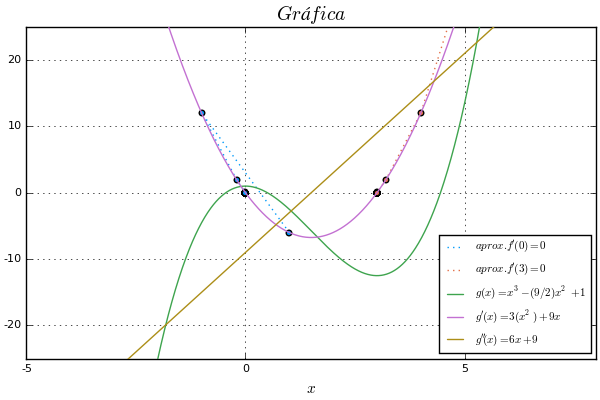

In [22]:
rango = -5:1e-2:8
d = [gp.(c)]
q = [gp.(p)]
plot(c, d, marker=(:circle), line=(:dot), xlim=(-5, 8), ylim=(-25, 25), lab=L"aprox. f'(0) = 0", title=L"Gráfica", xlabel=L"x")
plot!(p, q, marker=(:circle), line=(:dot), xlim=(-5, 8), ylim=(-25, 25), lab=L"aprox. f'(3) = 0")
plot!(rango, x -> g(x), lab=L"g(x)= x^3 - (9/2)x^2 + 1")
plot!(rango, x -> gp(x), lab=L"g'(x) = 3(x^2) + 9x")
plot!(rango, x -> gpp(x), lab=L"g''(x) = 6x + 9")

Los valores donde la función $g(x)$ tiene máximos o mínimos son los puntos donde se cumple $g'(x) = 0$ y son:
$$x = 0$$
$$x = 3$$

La función en estos puntos vale:
$$g(0) = 0$$
$$g(3) = -12.5$$

Evaluando en la segunda derivada encontramos:
$$g''(0) = -9$$
$$g''(3) = 9$$

Por lo tanto, $x = 0$ es un máximo local y $x = 3$ es un mínimo local.

**[2]** Otro método para optimizar es darse cuenta de que la función misma te puede dar información sobre por dónde buscar. 

**(i)** Considerando una función $f:\mathbb{R} \to \mathbb{R}$, si empezamos en una posición inicial $x_0$, ¿en cuál dirección nos podríamos desplazar (por un paso chiquito) para ir hacia un mínimo?

Analizando la pendiente de $f'(x_0)$ podríamos saber hacia qué lado seguir aproximando. Hacia donde se aproxime a una raíz, es decir, al eje $x$.

**(ii)** Impleméntalo, y dibuja la evolución en el tiempo del algoritmo, pintando la función como si fuera una colina, para distintas funciones.

Este método se llama **descenso de gradiente**.

In [ ]:
function decenso_grad(f::Function, fp::Function, x0::Real, α::Real)
    
end

**[3]** Podemos utilizar el descenso de gradietne también para buscar mínimos de funciones $f:\mathbb{R^n} \to \mathbb{R}$. Hazlo para algunas funciones $f:\mathbb{R}^2 \to \mathbb{R}$ y dibuja la evolución.

Una versión estocástica del descenso de gradiente se utiliza mucho hoy día en aplicaciones de aprendizaje automático ("machine learning").

## Mínimos cuadrados

La optimización es muy imporante en la estadística. Por ejemplo, podemos utilizar optimización para resolver el problema de mínimos cuadrados, como sigue.

**[4]** Genera unos datos artificiales $(x_i, y_i)$ cerca de una recta, utilizando `rand()` para generar números aleatorios.

In [1]:
?rand

search: rand randn rand! randn! randexp randperm randjump randexp! randcycle



```
rand([rng], [S], [dims...])
```

Pick a random element or array of random elements from the set of values specified by `S`; `S` can be

  * an indexable collection (for example `1:n` or `['x','y','z']`), or
  * a type: the set of values to pick from is then equivalent to `typemin(S):typemax(S)` for integers (this is not applicable to `BigInt`), and to $[0, 1)$ for floating point numbers;

`S` defaults to `Float64`.


In [11]:
x, y = rand(10, 2)

10×2 Array{Float64,2}:
 0.158895   0.228117 
 0.427754   0.182598 
 0.512244   0.751665 
 0.632689   0.24606  
 0.390547   0.174071 
 0.477493   0.557703 
 0.797808   0.989989 
 0.684553   0.101503 
 0.367682   0.171226 
 0.0719163  0.0354367

In [15]:
y[2]

LoadError: BoundsError

In [16]:
plot(x, y)

LoadError: In convertToAnyVector, could not handle the argument types: (Float64,)

**[5]** Queremos ajustar una recta $\ell(x)$ a los datos. 

**(i)** ¿Cuántos parámetros necesitaremos ajustar. Escribe una fórmula para $\ell$ en términos de estos parámetros.

**(ii)** En mínimos cuadrados, para cada punto $(x_i, y_i)$ calculamos la distancia cuadrada vertical desde la recta $\ell$. La suma de todos ellos nos da una **función de costo** o **función de pérdida**, la cual queremos minimizar con respecto a las variables de la recta.

Formula esto matemáticamente: ¿cuál función queremos minimizar, y qué satisface el mínimo?

**[6]** Utiliza el método de descenso de gradiente para resolver el problema. Dibuja el resultado - ¿es razonable? [Pista: Nota que tendrás que utilizar vectores (arreglos uni-dimensionales). En Julia, puedes operar con vectores utilizando operadores aritméticos, como si fueran vectores matemáticos.]

## Optimización con restricciones

**[7]** Utiliza un multiplicador de Lagrange para minimizar la función
$f(x,y) = 2x+y$, sujeta a la **restricción** $x^2 + y^2 = 1$.

Dibuja gráficamente lo que está pasando.